In [1]:

import pandas as pd
from generate_fake_patterns import (
    generate_baseline_series, 
    generate_baseline_and_predictions,
)
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

%load_ext autoreload
%autoreload 2


In [2]:
df = pd.read_csv("datasets/household_power_consumption.txt",delimiter=";")

/tmp/ipykernel_427712/534839069.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("datasets/household_power_consumption.txt",delimiter=";")


In [3]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


Available patterns:

Clean patterns: constant, linear_trend, exponential_trend, seasonal, seasonal_with_trend, multiple_seasonality, random_walk

Noisy patterns: constant_with_noise, linear_trend_with_noise, exponential_trend_with_noise, seasonal_with_noise, seasonal_with_trend_with_noise, multiple_seasonality_with_noise, random_walk_with_noise


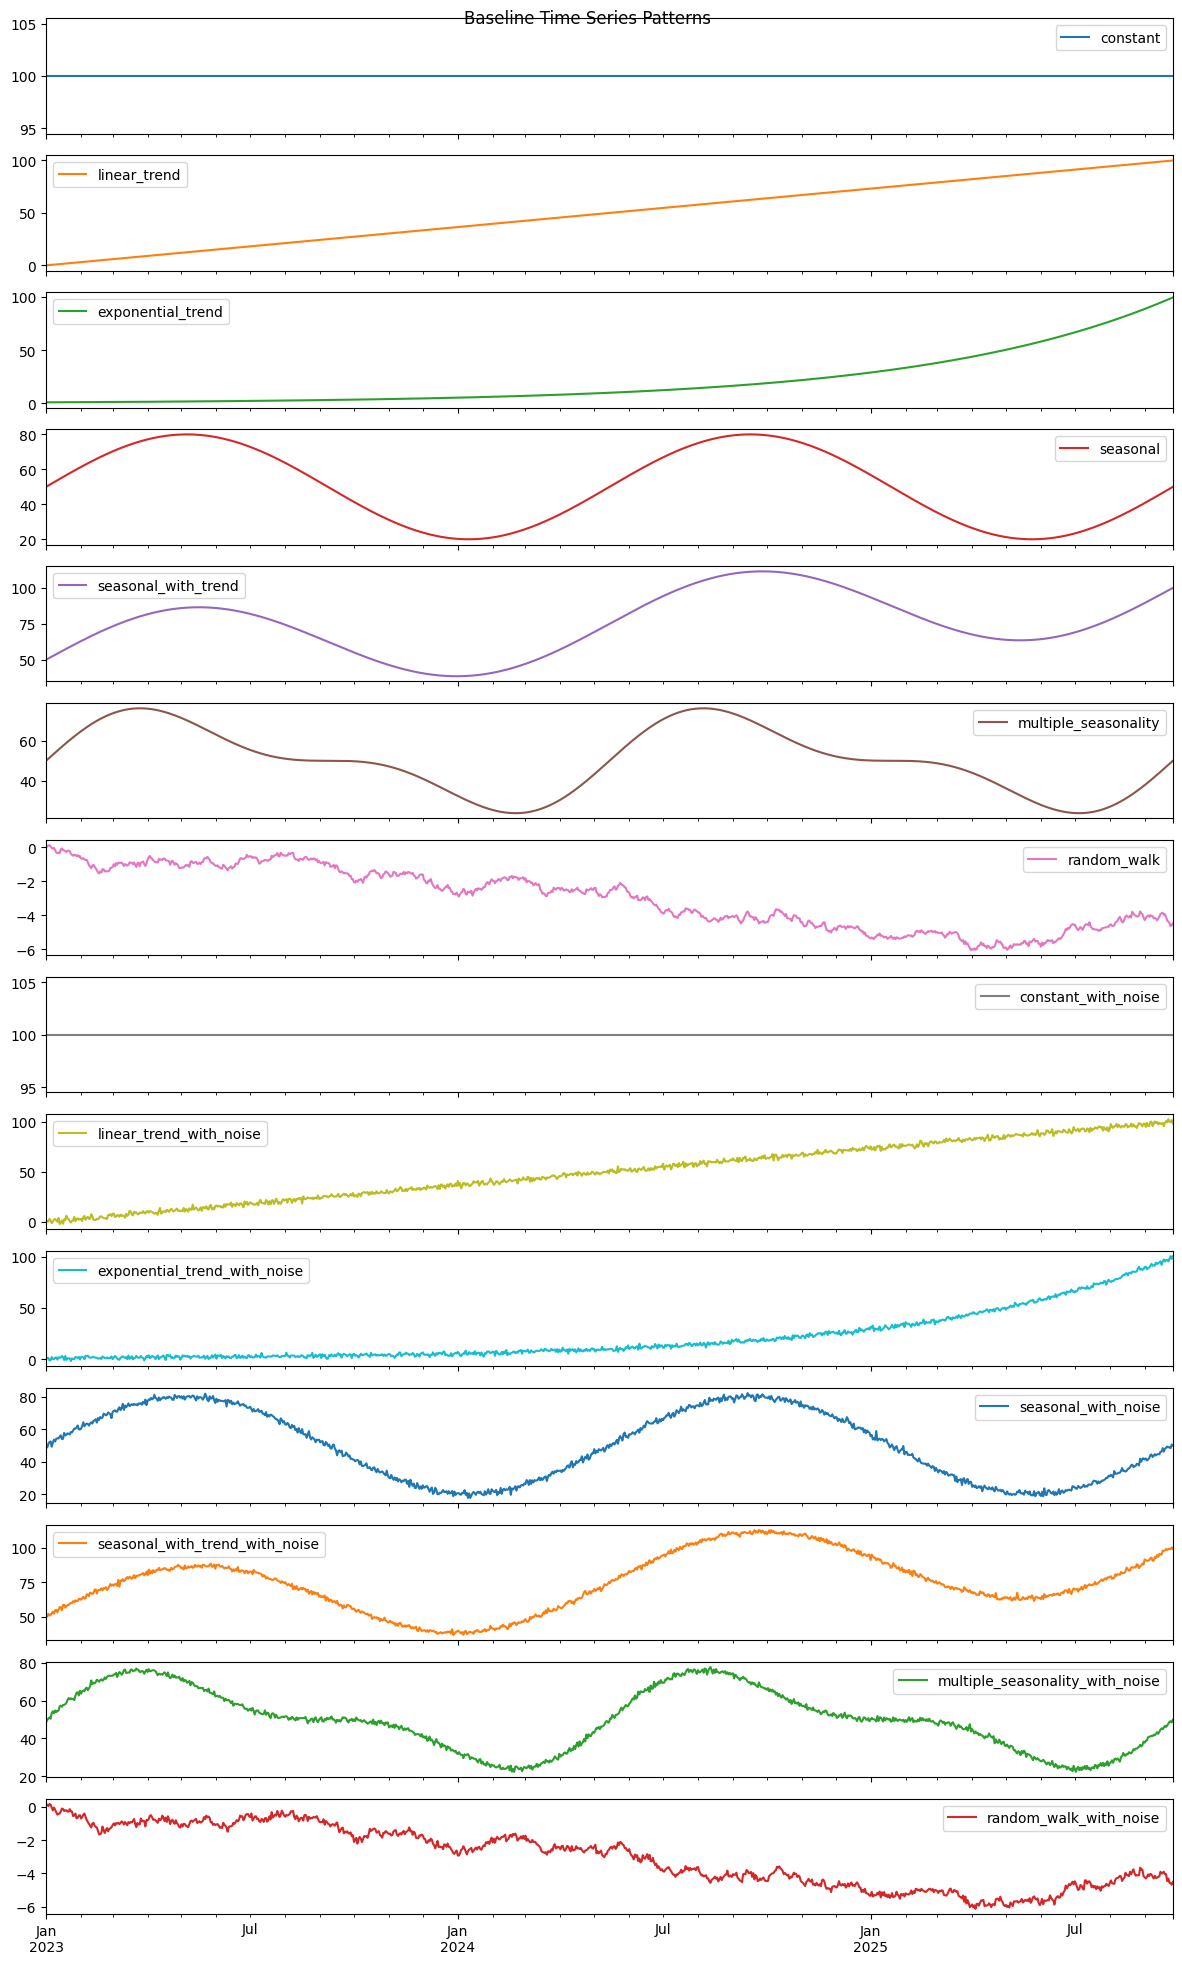

In [2]:
# Generate and plot
df = generate_baseline_series()
df.plot(subplots=True, figsize=(12, 20), title='Baseline Time Series Patterns')
plt.tight_layout()

print("Available patterns:")
print("\nClean patterns:", ', '.join(df.columns[:7]))
print("\nNoisy patterns:", ', '.join(df.columns[7:]))

In [17]:
df, metrics = generate_baseline_and_predictions()

df.columns



pattern_name: constant

            pred_name : perfect,
            baseline : [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 10

/home/ubuntu/amine/forecaster/paper_experiments/generate_fake_patterns.py:124: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  'smoothed': lambda x: pd.Series(x).rolling(5).mean().fillna(method='bfill'),



            pred_name : delayed,
            baseline : [-1.05000495e-02  1.93310253e-02  1.93714108e-01  1.29639580e-01
  2.17424303e-01  1.48456986e-01  2.76410686e-02 -7.69870309e-02
  1.08629937e-01  1.59295929e-01  2.16798151e-01  1.87039244e-01
  2.25062031e-01  2.35489950e-01  2.59978057e-01  2.50447374e-01
  1.73679989e-01  2.01173975e-01  2.32252626e-01  5.70260497e-01
  6.92367546e-01  6.39647127e-01  6.15211998e-01  5.80057138e-01
  3.89999674e-01  1.92730803e-01  7.63981124e-02  6.92857116e-02
  1.78805659e-02 -1.47503228e-03  3.47979635e-02  1.58300201e-01
  1.33447247e-01 -2.43714274e-02 -4.25872705e-03 -2.22907606e-02
  6.10480498e-02 -6.69845549e-02 -1.84852619e-01 -1.42129680e-01
 -9.88967816e-02 -2.01562139e-01 -6.84901389e-02 -6.81218523e-02
 -1.10372483e-01  1.08619129e-01  1.90193432e-01  4.17835110e-01
  3.02625306e-01  5.23049481e-02  2.52976391e-01  1.52898350e-01
  2.30594863e-01  2.54309709e-01  3.99950137e-01  4.04473882e-01
  5.90721231e-01  8.22996908e-01 

Index(['constant_baseline', 'constant_perfect', 'constant_noisy',
       'constant_biased', 'constant_delayed', 'constant_outliers',
       'linear_trend_baseline', 'linear_trend_perfect',
       'linear_trend_underestimate', 'linear_trend_overestimate',
       'linear_trend_lagged', 'linear_trend_nonlinear_bias',
       'linear_trend_step_changes', 'seasonal_baseline', 'seasonal_perfect',
       'seasonal_amplitude_error', 'seasonal_phase_shift',
       'seasonal_missed_peaks', 'seasonal_frequency_error',
       'seasonal_asymmetric_error', 'random_walk_baseline',
       'random_walk_perfect', 'random_walk_smoothed', 'random_walk_delayed',
       'random_walk_noisy', 'random_walk_trend_biased',
       'random_walk_regime_shifts', 'multiple_seasonality_baseline',
       'multiple_seasonality_perfect',
       'multiple_seasonality_missing_short_cycle',
       'multiple_seasonality_amplitude_ratio_error',
       'multiple_seasonality_noisy', 'trend_change_baseline',
       'trend_change_

In [18]:
df

,constant_baseline,constant_perfect,constant_noisy,constant_biased,constant_delayed,constant_outliers,linear_trend_baseline,linear_trend_perfect,linear_trend_underestimate,linear_trend_overestimate,...,cyclic_with_trend_perfect,cyclic_with_trend_trend_only,cyclic_with_trend_cycle_only,cyclic_with_trend_magnitude_error,exponential_growth_baseline,exponential_growth_perfect,exponential_growth_linear_approximation,exponential_growth_underestimate,exponential_growth_delayed_response,exponential_growth_noisy
2023-01-01,100.0,100.0,92.801829,110.0,100.0,100.0,0.0000,0.0000,0.00000,0.00000,...,-20.000000,0.0000,62.676046,6.338023,1.000000,1.000000,1.000000,1.000000,2.588170,0.942060
2023-01-02,100.0,100.0,93.303428,110.0,100.0,100.0,0.1001,0.1001,0.08008,0.12012,...,-19.819820,0.1001,63.823108,7.011654,1.001002,1.001002,1.001720,1.000801,2.590762,1.026625
2023-01-03,100.0,100.0,101.796934,110.0,100.0,100.0,0.2002,0.2002,0.16016,0.24024,...,-19.639640,0.2002,64.970171,7.685286,1.002004,1.002004,1.003440,1.001603,2.593356,0.973309
2023-01-04,100.0,100.0,96.893511,110.0,100.0,100.0,0.3003,0.3003,0.24024,0.36036,...,-19.459459,0.3003,66.117233,8.358917,1.003008,1.003008,1.005160,1.002405,2.595954,0.975346
2023-01-05,100.0,100.0,102.551494,110.0,100.0,100.0,0.4004,0.4004,0.32032,0.48048,...,-19.279279,0.4004,67.264296,9.032548,1.004012,1.004012,1.006880,1.003208,2.598554,1.082261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-22,100.0,100.0,109.262794,110.0,100.0,100.0,99.5996,99.5996,79.67968,119.51952,...,119.279279,99.5996,69.355476,109.277338,2.707420,2.707420,2.711402,2.218423,2.575248,2.682286
2025-09-23,100.0,100.0,90.582576,110.0,100.0,100.0,99.6997,99.6997,79.75976,119.63964,...,119.459459,99.6997,30.502539,89.950969,2.710131,2.710131,2.713122,2.220201,2.577827,2.705850
2025-09-24,100.0,100.0,98.289689,110.0,100.0,100.0,99.7998,99.7998,79.83984,119.75976,...,119.639640,99.7998,31.649602,90.624601,2.712845,2.712845,2.714842,2.221979,2.580409,2.754550
2025-09-25,100.0,100.0,94.441903,110.0,100.0,100.0,99.8999,99.8999,79.91992,119.87988,...,119.819820,99.8999,32.796664,91.298232,2.715562,2.715562,2.716562,2.223759,2.582993,2.529339


In [19]:
metrics

{'constant': {'perfect': {'MSE': 0.0,
   'MAE': 0.0,
   'RMSE': 0.0,
   'MAPE': 0.0,
   'WMAPE': np.float64(0.0),
   'NRMSE': np.float64(0.0),
   'Overlay_area': 0.998001},
  'noisy': {'MSE': 24.755559618450402,
   'MAE': 3.982517971725053,
   'RMSE': 4.975495916835869,
   'MAPE': 0.03982517971725053,
   'WMAPE': np.float64(0.03982517971725053),
   'NRMSE': np.float64(0.04975495916835869),
   'Overlay_area': 0.151697},
  'biased': {'MSE': 100.00000000000026,
   'MAE': 10.00000000000001,
   'RMSE': 10.000000000000012,
   'MAPE': 0.1000000000000001,
   'WMAPE': np.float64(0.1000000000000001),
   'NRMSE': np.float64(0.10000000000000013),
   'Overlay_area': 0.0},
  'delayed': {'MSE': 0.0,
   'MAE': 0.0,
   'RMSE': 0.0,
   'MAPE': 0.0,
   'WMAPE': np.float64(0.0),
   'NRMSE': np.float64(0.0),
   'Overlay_area': 0.998001},
  'outliers': {'MSE': 50.0,
   'MAE': 1.0,
   'RMSE': 7.0710678118654755,
   'MAPE': 0.01,
   'WMAPE': np.float64(0.01),
   'NRMSE': np.float64(0.07071067811865475),
   'O

In [8]:
# exponential seems to give back WEIRRRRD cases

In [20]:
n_points = 1000
x = np.linspace(0, 4*np.pi, n_points)
patterns = {
        #'constant': (np.ones(n_points) * 100, {
        #    'perfect': lambda x: x,
        #    'noisy': lambda x: x + np.random.normal(0, 5, n_points),
        #    'biased': lambda x: x * 1.1,
        #    'delayed': lambda x: np.roll(x, 5),
        #    'outliers': lambda x: x + np.where(np.random.random(n_points) > 0.98, 50, 0),
        #    'missing_values': lambda x: np.where(np.random.random(n_points) > 0.95, np.nan, x)
        #}),
        
        'linear_trend': (np.linspace(0, 100, n_points), {
            'perfect': lambda x: x,
            'underestimate': lambda x: x * 0.8,
            'overestimate': lambda x: x * 1.2,
            'lagged': lambda x: np.roll(x, 10),
            'nonlinear_bias': lambda x: x + 0.001 * x**2,
            'step_changes': lambda x: x + np.where(x > 50, 20, 0)
        }),
        
        'seasonal': (50 + 30 * np.sin(x), {
            'perfect': lambda x: x,
            'amplitude_error': lambda x: 50 + 20 * np.sin(x),
            'phase_shift': lambda x: 50 + 30 * np.sin(x + 0.5),
            'missed_peaks': lambda x: np.where(x > 60, 60, x),
            'frequency_error': lambda x: 50 + 30 * np.sin(1.1 * x),
            'asymmetric_error': lambda x: x + np.where(np.sin(x) > 0, 5, -2)
        }),
        
        'random_walk': (np.cumsum(np.random.normal(0, 0.1, n_points)), {
            'perfect': lambda x: x,
            'smoothed': lambda x: pd.Series(x).rolling(5).mean().fillna(method='bfill'),
            'delayed': lambda x: np.roll(x, 3),
            'noisy': lambda x: x + np.random.normal(0, x.std()*0.1, n_points),
            'trend_biased': lambda x: x + np.linspace(0, x.std(), n_points),
            'regime_shifts': lambda x: x + np.where(np.random.random(n_points) > 0.95, x.std()*2, 0)
        }),
        
        'multiple_seasonality': (
            50 + 20 * np.sin(x) + 10 * np.sin(7*x), {
            'perfect': lambda x: x,
            'missing_short_cycle': lambda x: 50 + 20 * np.sin(x),
            'amplitude_ratio_error': lambda x: 50 + 15 * np.sin(x) + 15 * np.sin(7*x),
            'noisy': lambda x: x + np.random.normal(0, 3, n_points)
        }),
        
        'trend_change': (
            np.concatenate([
                np.linspace(0, 50, n_points//2),
                np.linspace(50, 30, n_points-n_points//2)
            ]), {
            'perfect': lambda x: x,
            'missed_reversal': lambda x: np.concatenate([
                np.linspace(0, 50, n_points//2),
                np.linspace(50, 50, n_points-n_points//2)
            ]),
            'late_detection': lambda x: np.roll(x, n_points//10),
            'overreaction': lambda x: x * np.where(np.arange(n_points) > n_points//2, 0.7, 1.0)
        }),
        
        'cyclic_with_trend': (
            np.linspace(0, 100, n_points) + 20 * signal.sawtooth(x), {
            'perfect': lambda x: x,
            'trend_only': lambda x: np.linspace(0, 100, n_points),
            'cycle_only': lambda x: 50 + 20 * signal.sawtooth(x),
            'magnitude_error': lambda x: np.linspace(0, 100, n_points) + 10 * signal.sawtooth(x)
        }),
        
        'exponential_growth': (
            np.exp(np.linspace(0, 1, n_points)), {
            'perfect': lambda x: x,
            'linear_approximation': lambda x: np.linspace(1, np.max(x), n_points),
            'underestimate': lambda x: x**0.8,
            'delayed_response': lambda x: np.roll(x, n_points//20),
            'noisy': lambda x: x * (1 + np.random.normal(0, 0.05, n_points))
        })
    } 

In [13]:
exp_growth_df = pd.DataFrame(
    {
        "baseline" : patterns["exponential_growth"][0],
        "perfect" : patterns["exponential_growth"][1]["perfect"](patterns["exponential_growth"][0]),
        "linear_approximation" : patterns["exponential_growth"][1]["linear_approximation"](patterns["exponential_growth"][0]),
        "underestimate" : patterns["exponential_growth"][1]["underestimate"](patterns["exponential_growth"][0]),
        "delayed_response" : patterns["exponential_growth"][1]["delayed_response"](patterns["exponential_growth"][0]),
        "noisy" : patterns["exponential_growth"][1]["noisy"](patterns["exponential_growth"][0]),
    }
)

In [21]:
exp_growth_df

,baseline,perfect,linear_approximation,underestimate,delayed_response,noisy
0,1.000000,1.000000,1.000000,1.000000,2.588170,0.953241
1,1.001002,1.001002,1.001720,1.000801,2.590762,0.998310
2,1.002004,1.002004,1.003440,1.001603,2.593356,1.023050
3,1.003008,1.003008,1.005160,1.002405,2.595954,1.036823
4,1.004012,1.004012,1.006880,1.003208,2.598554,0.852020
...,...,...,...,...,...,...
995,2.707420,2.707420,2.711402,2.218423,2.575248,2.728150
996,2.710131,2.710131,2.713122,2.220201,2.577827,2.925786
997,2.712845,2.712845,2.714842,2.221979,2.580409,2.847238
998,2.715562,2.715562,2.716562,2.223759,2.582993,2.933363


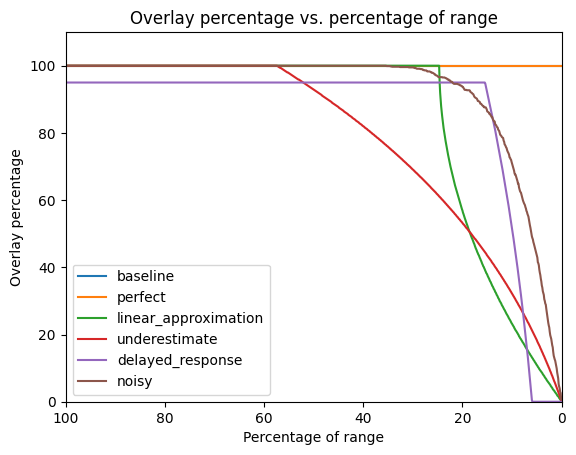

In [22]:
from src.processing_forecasts.metrics import Evaluate

metric_exp = Evaluate(target_values=exp_growth_df["baseline"],prediction=None).overlay_dx_visualisation_df(forecasts_df=exp_growth_df,max_percentage=100,min_percentage=0,step=0.1)

In [13]:
# do corr matrix of metric values on all 

In [23]:
metrics

{'constant': {'perfect': {'MSE': 0.0,
   'MAE': 0.0,
   'RMSE': 0.0,
   'MAPE': 0.0,
   'WMAPE': np.float64(0.0),
   'NRMSE': np.float64(0.0),
   'Overlay_area': 0.998001},
  'noisy': {'MSE': 24.755559618450402,
   'MAE': 3.982517971725053,
   'RMSE': 4.975495916835869,
   'MAPE': 0.03982517971725053,
   'WMAPE': np.float64(0.03982517971725053),
   'NRMSE': np.float64(0.04975495916835869),
   'Overlay_area': 0.151697},
  'biased': {'MSE': 100.00000000000026,
   'MAE': 10.00000000000001,
   'RMSE': 10.000000000000012,
   'MAPE': 0.1000000000000001,
   'WMAPE': np.float64(0.1000000000000001),
   'NRMSE': np.float64(0.10000000000000013),
   'Overlay_area': 0.0},
  'delayed': {'MSE': 0.0,
   'MAE': 0.0,
   'RMSE': 0.0,
   'MAPE': 0.0,
   'WMAPE': np.float64(0.0),
   'NRMSE': np.float64(0.0),
   'Overlay_area': 0.998001},
  'outliers': {'MSE': 50.0,
   'MAE': 1.0,
   'RMSE': 7.0710678118654755,
   'MAPE': 0.01,
   'WMAPE': np.float64(0.01),
   'NRMSE': np.float64(0.07071067811865475),
   'O

In [25]:
metric_names = ["MSE","MAE","RMSE","MAPE",
#"MAPE","SMAPE",
"WMAPE","NRMSE","Overlay_area"]
dic = {
    metric_name : [] for metric_name in metric_names
}
for case in metrics:
    for subcase in metrics[case]:
        print(subcase)
        for metric_name in metric_names:
            dic[metric_name].append(
                metrics[case][subcase][metric_name]
            )

df = pd.DataFrame(dic)
        

perfect
noisy
biased
delayed
outliers
perfect
underestimate
overestimate
lagged
nonlinear_bias
step_changes
perfect
amplitude_error
phase_shift
missed_peaks
frequency_error
asymmetric_error
perfect
smoothed
delayed
noisy
trend_biased
regime_shifts
perfect
missing_short_cycle
amplitude_ratio_error
noisy
perfect
missed_reversal
late_detection
overreaction
perfect
trend_only
cycle_only
magnitude_error
perfect
linear_approximation
underestimate
delayed_response
noisy


In [26]:
df

,MSE,MAE,RMSE,MAPE,WMAPE,NRMSE,Overlay_area
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.998001
1,24.755560,3.982518,4.975496,3.982518e-02,0.039825,0.049755,0.151697
2,100.000000,10.000000,10.000000,1.000000e-01,0.100000,0.100000,0.000000
3,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.998001
4,50.000000,1.000000,7.071068,1.000000e-02,0.010000,0.070711,0.978041
5,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.998001
6,133.400067,10.000000,11.549895,1.998000e-01,0.200000,0.230998,0.799199
7,133.400067,10.000000,11.549895,1.998000e-01,0.200000,0.230998,0.799199
8,99.198297,1.981982,9.959834,4.463027e+14,0.039640,0.199197,0.968736
9,20.030033,3.335002,4.475493,5.000000e-02,0.066700,0.089510,0.932309


In [39]:
cases = []
for case in metrics:
    for subcase in metrics[case]:
        cases.append(
        case+"_"+f"{subcase}"
        )

In [40]:
cases

['constant_perfect',
 'constant_noisy',
 'constant_biased',
 'constant_delayed',
 'constant_outliers',
 'linear_trend_perfect',
 'linear_trend_underestimate',
 'linear_trend_overestimate',
 'linear_trend_lagged',
 'linear_trend_nonlinear_bias',
 'linear_trend_step_changes',
 'seasonal_perfect',
 'seasonal_amplitude_error',
 'seasonal_phase_shift',
 'seasonal_missed_peaks',
 'seasonal_frequency_error',
 'seasonal_asymmetric_error',
 'random_walk_perfect',
 'random_walk_smoothed',
 'random_walk_delayed',
 'random_walk_noisy',
 'random_walk_trend_biased',
 'random_walk_regime_shifts',
 'multiple_seasonality_perfect',
 'multiple_seasonality_missing_short_cycle',
 'multiple_seasonality_amplitude_ratio_error',
 'multiple_seasonality_noisy',
 'trend_change_perfect',
 'trend_change_missed_reversal',
 'trend_change_late_detection',
 'trend_change_overreaction',
 'cyclic_with_trend_perfect',
 'cyclic_with_trend_trend_only',
 'cyclic_with_trend_cycle_only',
 'cyclic_with_trend_magnitude_error',
 

In [6]:
df = df.dropna()

In [32]:
df

,MSE,MAE,RMSE,MAPE,WMAPE,NRMSE,Overlay_area
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.998001
1,24.755560,3.982518,4.975496,3.982518e-02,0.039825,0.049755,0.151697
2,100.000000,10.000000,10.000000,1.000000e-01,0.100000,0.100000,0.000000
3,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.998001
4,50.000000,1.000000,7.071068,1.000000e-02,0.010000,0.070711,0.978041
5,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.998001
6,133.400067,10.000000,11.549895,1.998000e-01,0.200000,0.230998,0.799199
7,133.400067,10.000000,11.549895,1.998000e-01,0.200000,0.230998,0.799199
8,99.198297,1.981982,9.959834,4.463027e+14,0.039640,0.199197,0.968736
9,20.030033,3.335002,4.475493,5.000000e-02,0.066700,0.089510,0.932309


In [27]:
df.corr(method="pearson")

,MSE,MAE,RMSE,MAPE,WMAPE,NRMSE,Overlay_area
MSE,1.000000,0.939679,0.937888,-0.012896,0.821520,0.635288,-0.572441
MAE,0.939679,1.000000,0.986757,-0.039681,0.846451,0.621874,-0.700228
RMSE,0.937888,0.986757,1.000000,0.068111,0.829635,0.621745,-0.664366
MAPE,-0.012896,-0.039681,0.068111,1.000000,-0.051550,0.019074,0.080451
WMAPE,0.821520,0.846451,0.829635,-0.051550,1.000000,0.890194,-0.597205
NRMSE,0.635288,0.621874,0.621745,0.019074,0.890194,1.000000,-0.427333
Overlay_area,-0.572441,-0.700228,-0.664366,0.080451,-0.597205,-0.427333,1.000000


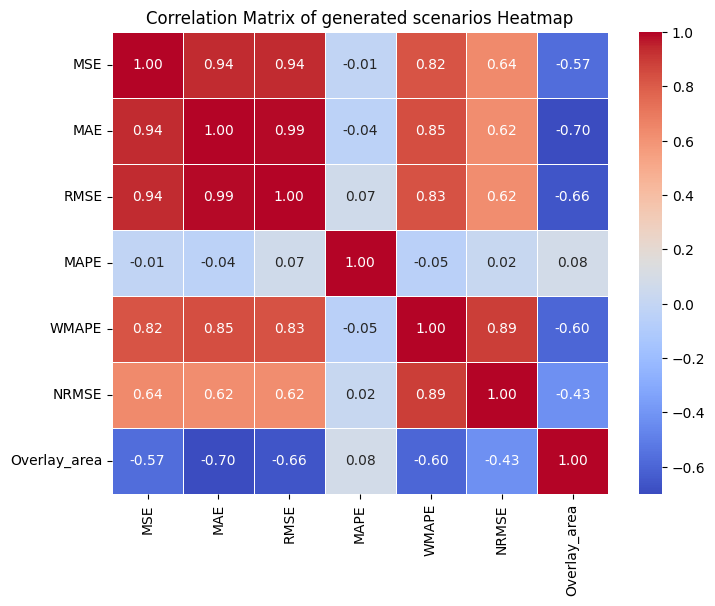

In [29]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.corr(method="pearson"),
    annot=True,          # Annotate the correlation values in the cells
    cmap='coolwarm',     # Use a colormap
    fmt='.2f',           # Format for the annotation text
    linewidths=0.5,      # Line width between cells
    cbar=True            # Display the color bar
)
plt.title("Correlation Matrix of generated scenarios Heatmap")
plt.show()

In [31]:
metrics

{'constant': {'perfect': {'MSE': 0.0,
   'MAE': 0.0,
   'RMSE': 0.0,
   'MAPE': 0.0,
   'WMAPE': np.float64(0.0),
   'NRMSE': np.float64(0.0),
   'Overlay_area': 0.998001},
  'noisy': {'MSE': 24.755559618450402,
   'MAE': 3.982517971725053,
   'RMSE': 4.975495916835869,
   'MAPE': 0.03982517971725053,
   'WMAPE': np.float64(0.03982517971725053),
   'NRMSE': np.float64(0.04975495916835869),
   'Overlay_area': 0.151697},
  'biased': {'MSE': 100.00000000000026,
   'MAE': 10.00000000000001,
   'RMSE': 10.000000000000012,
   'MAPE': 0.1000000000000001,
   'WMAPE': np.float64(0.1000000000000001),
   'NRMSE': np.float64(0.10000000000000013),
   'Overlay_area': 0.0},
  'delayed': {'MSE': 0.0,
   'MAE': 0.0,
   'RMSE': 0.0,
   'MAPE': 0.0,
   'WMAPE': np.float64(0.0),
   'NRMSE': np.float64(0.0),
   'Overlay_area': 0.998001},
  'outliers': {'MSE': 50.0,
   'MAE': 1.0,
   'RMSE': 7.0710678118654755,
   'MAPE': 0.01,
   'WMAPE': np.float64(0.01),
   'NRMSE': np.float64(0.07071067811865475),
   'O

In [9]:
df_small = df[["pearson","R2","Overlay_area"]]

KeyError: "None of [Index(['pearson', 'R2', 'Overlay_area'], dtype='object')] are in the [columns]"

In [21]:
df_small.corr()

,pearson,R2,Overlay_area
pearson,1.000000,0.965899,0.916232
R2,0.965899,1.000000,0.951772
Overlay_area,0.916232,0.951772,1.000000
